In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 100) # Altera o default que o pandas entrega.

In [4]:
df = pd.read_csv('dados_enem_2021_BA.csv')

In [7]:
df.shape

(266194, 51)

In [8]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


* Média na nota de matemática por gênero

In [11]:
subset_tp_sexo_m = df.query('TP_SEXO == "M"')
subset_tp_sexo_f = df.query('TP_SEXO == "F"')

### Agregação:
* `df.column.agg_func()`

In [12]:
# Nota máxima do gênero masculino
subset_tp_sexo_m.NU_NOTA_MT.max()

953.1

In [14]:
# Nota máxima dp gênero feminino
subset_tp_sexo_f.NU_NOTA_MT.max()

944.1

In [15]:
subset_tp_sexo_m.NU_NOTA_MT.mean()

538.500684898471

In [16]:
subset_tp_sexo_f.NU_NOTA_MT.mean()

499.7702519508294

In [24]:
provas = df.columns[(df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP')))].tolist()
display(provas)
idCandidato = ['NU_INSCRICAO']

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [28]:
subset_tp_sexo_m[provas].agg(['min', 'mean', 'median', 'max']).T

,min,mean,median,max
NU_NOTA_CN,0.0,495.434682,488.80,839.0
NU_NOTA_CH,0.0,519.710675,523.00,846.9
NU_NOTA_LC,0.0,496.799719,499.75,773.5
NU_NOTA_MT,0.0,538.500685,522.00,953.1
NU_NOTA_REDACAO,0.0,592.528525,600.00,980.0


In [27]:
subset_tp_sexo_f[provas].agg(['min', 'mean', 'median', 'max']).T


,min,mean,median,max
NU_NOTA_CN,0.0,471.422362,462.2,819.4
NU_NOTA_CH,0.0,498.828471,493.4,832.5
NU_NOTA_LC,0.0,484.916775,485.2,821.6
NU_NOTA_MT,0.0,499.770252,478.2,944.1
NU_NOTA_REDACAO,0.0,613.832573,600.0,1000.0


* Qual foi o aluno que tirou a nota máxima???

In [33]:
df.NU_NOTA_MT.max()
df.iloc[df.NU_NOTA_MT.idxmax(), ]

NU_INSCRICAO                                                   210053912306
NU_ANO                                                                 2021
TP_FAIXA_ETARIA                                                           2
TP_SEXO                                                                   M
TP_ESTADO_CIVIL                                                           1
TP_COR_RACA                                                               3
TP_NACIONALIDADE                                                          1
TP_ST_CONCLUSAO                                                           2
TP_ANO_CONCLUIU                                                           0
TP_ESCOLA                                                                 3
TP_ENSINO                                                               1.0
IN_TREINEIRO                                                              0
CO_MUNICIPIO_ESC                                                  2933307.0
NO_MUNICIPIO

In [40]:
df[df.NU_NOTA_REDACAO.notna()].NU_NOTA_REDACAO.isna().sum()

0

In [46]:
mask_1 = df.NU_NOTA_REDACAO.notna()
mask_2 = df.NU_NOTA_REDACAO != 0
subset = df[(mask_1) & (mask_2)]

In [47]:
display(subset)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266164,210051081843,2021,13,F,2,3,1,1,14,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,Itabuna,29,BA,1,1,1,1,1048.0,1018.0,1027.0,1037.0,485.2,438.8,401.0,538.9,CADBACCDCEABADCDAABBCAADCBCADACADDEEDDDEEABDE,CEDAADCECCA

<Axes: >

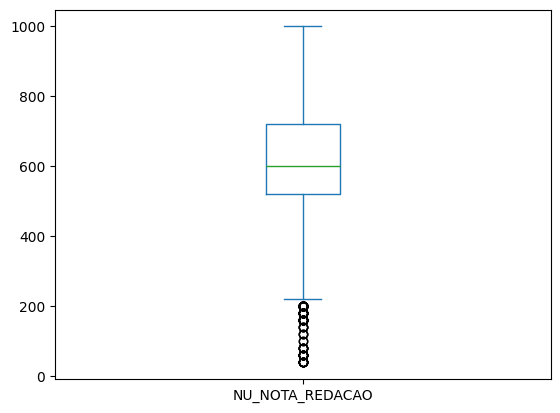

In [48]:
subset.NU_NOTA_REDACAO.plot(kind="box")

<Axes: ylabel='Frequency'>

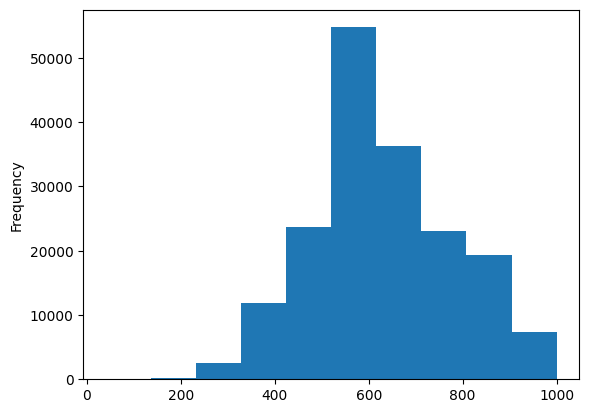

In [49]:
subset.NU_NOTA_REDACAO.plot(kind="hist")


<Axes: ylabel='Frequency'>

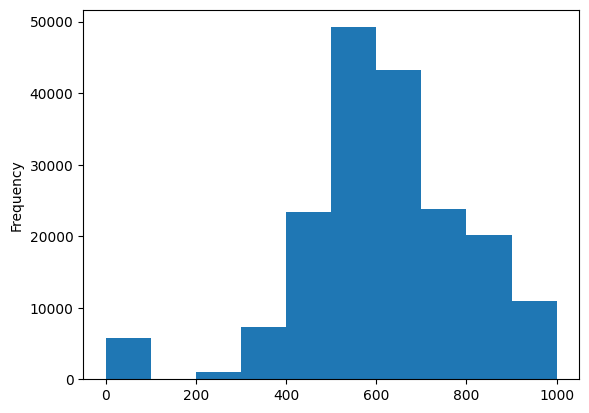

In [50]:
df.NU_NOTA_REDACAO.plot(kind="hist")


In [52]:
subset.NU_NOTA_REDACAO.agg(['min', 'mean', 'median', 'max'])

min         40.000000
mean       625.944838
median     600.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [42]:
df[(df.NU_NOTA_REDACAO != 0)].NU_NOTA_REDACAO


0         380.0
1           NaN
2         460.0
3         580.0
4         540.0
          ...  
266189      NaN
266190      NaN
266191      NaN
266192      NaN
266193      NaN
Name: NU_NOTA_REDACAO, Length: 260386, dtype: float64

* Axis na função de agregação

In [53]:
df[provas].mean()

NU_NOTA_CN         479.939563
NU_NOTA_CH         506.234466
NU_NOTA_LC         489.131131
NU_NOTA_MT         513.507987
NU_NOTA_REDACAO    606.276969
dtype: float64

In [54]:
# Média das colunas
df[provas].mean(axis=0)


NU_NOTA_CN         479.939563
NU_NOTA_CH         506.234466
NU_NOTA_LC         489.131131
NU_NOTA_MT         513.507987
NU_NOTA_REDACAO    606.276969
dtype: float64

In [55]:
# Média das linhas
df[provas].mean(axis=1)

0         466.94
1            NaN
2         447.88
3         562.10
4         544.00
           ...  
266189       NaN
266190       NaN
266191       NaN
266192       NaN
266193       NaN
Length: 266194, dtype: float64

* Missing

imputar missing: `.fillna()`

In [99]:
# missing simbólico
# -1
df_copy = df.copy()

df_copy['MEAN'] = df[provas].mean(axis=1)

df_copy.MEAN.fillna(-1)

0         466.94
1          -1.00
2         447.88
3         562.10
4         544.00
           ...  
266189     -1.00
266190     -1.00
266191     -1.00
266192     -1.00
266193     -1.00
Name: MEAN, Length: 266194, dtype: float64

In [100]:
mean = np.mean(df_copy.MEAN)

<Axes: >

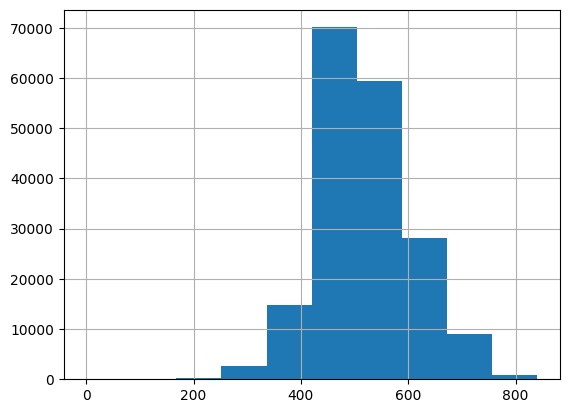

In [103]:
df_copy.MEAN.hist()

<Axes: >

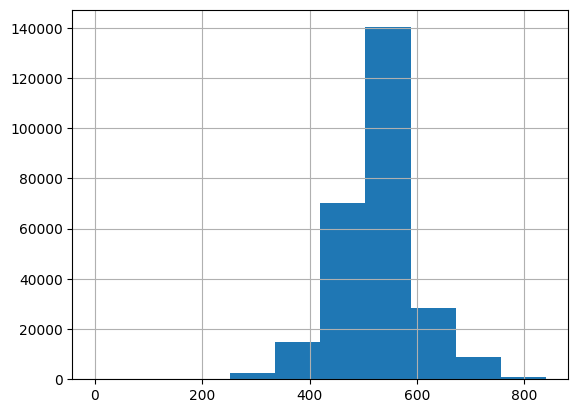

In [102]:
df_copy.MEAN.fillna(mean).hist()

* Imputar pela mediana

In [104]:
df_copy.MEAN.mean()

518.1292550982433

In [106]:
median = df_copy.MEAN.median()
df_copy.MEAN.fillna(median)


0         466.94
1         509.26
2         447.88
3         562.10
4         544.00
           ...  
266189    509.26
266190    509.26
266191    509.26
266192    509.26
266193    509.26
Name: MEAN, Length: 266194, dtype: float64

## Agrupamento

Anteriormente aprendemos a aplicar funções de agregação de forma genérica para uma ou mais variáveis. Algo muito comum quando estamos analisando dados é obter tais medidas agrupadas. Ou seja, qual é a média da prova de matemática por gênero?

* Agrupamento 

Qual a proporção entre os gêneros??




In [6]:
df.TP_SEXO.value_counts()

TP_SEXO
F    171997
M     94197
Name: count, dtype: int64

In [7]:
# fazendo por GroupBy

df.groupby(by = ['TP_SEXO'])['NU_INSCRICAO'].count()

TP_SEXO
F    171997
M     94197
Name: NU_INSCRICAO, dtype: int64

In [8]:
df.TP_ESCOLA.value_counts()

TP_ESCOLA
1    177170
2     76984
3     12040
Name: count, dtype: int64

In [11]:
df.groupby(by=['TP_SEXO', 'TP_ESCOLA'])['NU_INSCRICAO'].count()

# Daí eu tenho o numero de alunos de cada gênero e de cada tipo de escola

TP_SEXO  TP_ESCOLA
F        1            114715
         2             50561
         3              6721
M        1             62455
         2             26423
         3              5319
Name: NU_INSCRICAO, dtype: int64

Qual a distribuição de frequência dos alunos por tipo de escola?

In [17]:
df.groupby(by = ['TP_ESCOLA'])['NU_INSCRICAO'].count().sort_index()


TP_ESCOLA
1    177170
2     76984
3     12040
Name: NU_INSCRICAO, dtype: int64

Qual o desempenho em matemática por tipo de escola?

In [20]:
df.groupby(by = ['TP_ESCOLA'])['NU_NOTA_MT'].mean()

TP_ESCOLA
1    519.016313
2    487.375050
3    579.833900
Name: NU_NOTA_MT, dtype: float64

In [25]:
df.groupby(by=['TP_SEXO'])[['NU_NOTA_MT', 'NU_NOTA_CN']].agg(['min', 'max','mean', 'median', 'std']).T

# faz a mesma coisa porém para duas notas e eu posso agregar varias funções 

TP_SEXO                     F           M
NU_NOTA_MT min       0.000000    0.000000
           max     944.100000  953.100000
           mean    499.770252  538.500685
           median  478.200000  522.000000
           std      94.102063  108.573438
NU_NOTA_CN min       0.000000    0.000000
           max     819.400000  839.000000
           mean    471.422362  495.434682
           median  462.200000  488.800000
           std      71.132589   79.370690

In [29]:
df.groupby(by = ['TP_ESCOLA']).agg({'NU_NOTA_MT': ['mean', 'median'], 'NU_NOTA_CN': ['min', 'max', 'std']})

# Para diferentes variaveis podemos aplicar diferentes medidas de agregação 

NU_NOTA_MT        NU_NOTA_CN                  
                 mean median        min    max        std
TP_ESCOLA                                                
1          519.016313  497.8        0.0  839.0  76.762272
2          487.375050  468.9        0.0  819.4  63.182395
3          579.833900  581.6      340.1  796.3  79.613322

* Nota média por município

In [30]:
df.NO_MUNICIPIO_PROVA

0              Ruy Barbosa
1                 Salvador
2                Barreiras
3            Santo Estêvão
4         Feira de Santana
                ...       
266189          Alagoinhas
266190            Juazeiro
266191            Salvador
266192            Salvador
266193            Salvador
Name: NO_MUNICIPIO_PROVA, Length: 266194, dtype: object

In [72]:
df_visao_municipio= (df.query('NU_NOTA_MT != 0' ).groupby(by = ['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'], as_index= False)['NU_NOTA_MT'].agg(['mean','median', 'min', 'max']).rename(columns = {
    'NO_MUNICIPIO_PROVA': 'Municipio',
    'CO_MUNICIPIO_PROVA': 'COD_IBGE',
    'mean': 'média_MT',
    'median': 'mediana_MT',
    'min': 'minimo_MT',
    'max': 'maximo_MT',
}).sort_values(by= ['maximo_MT', 'média_MT', 'mediana_MT'], ascending=False).reset_index(drop=True))

display(df_visao_municipio)

,Municipio,COD_IBGE,média_MT,mediana_MT,minimo_MT,maximo_MT
0,Vitória da Conquista,2933307,536.491289,517.30,315.5,953.1
1,Salvador,2927408,534.623544,515.60,315.3,953.1
2,Barreiras,2903201,517.589528,496.80,318.8,948.8
3,Feira de Santana,2910800,525.103365,502.90,316.0,948.5
4,Serrinha,2930501,501.138564,479.85,346.8,948.5
...,...,...,...,...,...,...
157,Cansanção,2906808,475.027413,459.20,360.9,726.9
158,Oliveira dos Brejinhos,2923209,505.673239,488.10,380.6,707.2
159,Sento Sé,2930204,476.352846,462.30,367.8,702.3
160,Umburanas,2932457,464.582090,453.50,357.6,686.9


In [59]:
df_quantidade_inscritos = (df.groupby(by = ['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'], as_index = False)['NU_INSCRICAO'].count().rename(columns = {
    'NO_MUNICIPIO_PROVA': "Município",
    'CO_MUNICIPIO_PROVA': "COD_IBGE",
    'NU_INSCRICAO': 'Qtd_inscritos'
    }).sort_values(by = ['Qtd_inscritos'], ascending=False).reset_index(drop=True))

display(df_quantidade_inscritos)
# numero de inscritos por município

,Município,COD_IBGE,Qtd_inscritos
0,Salvador,2927408,58502
1,Feira de Santana,2910800,16689
2,Vitória da Conquista,2933307,10792
3,Barreiras,2903201,6083
4,Lauro de Freitas,2919207,5647
...,...,...,...
157,Sento Sé,2930204,200
158,São Félix,2929008,179
159,Itanhém,2916005,175
160,Riachão das Neves,2926202,172


In [64]:
total = df_quantidade_inscritos.Qtd_inscritos.sum()
df_quantidade_inscritos['Percentual_Inscritos']=(df_quantidade_inscritos.Qtd_inscritos / total * 100).round(2)
df_quantidade_inscritos['NU_ANO'] = 2021

display(df_quantidade_inscritos)

,Município,COD_IBGE,Qtd_inscritos,Percentual_Inscritos,NU_ANO
0,Salvador,2927408,58502,21.98,2021
1,Feira de Santana,2910800,16689,6.27,2021
2,Vitória da Conquista,2933307,10792,4.05,2021
3,Barreiras,2903201,6083,2.29,2021
4,Lauro de Freitas,2919207,5647,2.12,2021
...,...,...,...,...,...
157,Sento Sé,2930204,200,0.08,2021
158,São Félix,2929008,179,0.07,2021
159,Itanhém,2916005,175,0.07,2021
160,Riachão das Neves,2926202,172,0.06,2021


In [76]:
pd.merge(
    df_visao_municipio.drop(columns= ['Municipio']),
    df_quantidade_inscritos,
    on = 'COD_IBGE',
    how = 'inner'
)

,COD_IBGE,média_MT,mediana_MT,minimo_MT,maximo_MT,Município,Qtd_inscritos,Percentual_Inscritos,NU_ANO
0,2933307,536.491289,517.30,315.5,953.1,Vitória da Conquista,10792,4.05,2021
1,2927408,534.623544,515.60,315.3,953.1,Salvador,58502,21.98,2021
2,2903201,517.589528,496.80,318.8,948.8,Barreiras,6083,2.29,2021
3,2910800,525.103365,502.90,316.0,948.5,Feira de Santana,16689,6.27,2021
4,2930501,501.138564,479.85,346.8,948.5,Serrinha,2802,1.05,2021
...,...,...,...,...,...,...,...,...,...
157,2906808,475.027413,459.20,360.9,726.9,Cansanção,415,0.16,2021
158,2923209,505.673239,488.10,380.6,707.2,Oliveira dos Brejinhos,209,0.08,2021
159,2930204,476.352846,462.30,367.8,702.3,Sento Sé,200,0.08,2021
160,2932457,464.582090,453.50,357.6,686.9,Umburanas,225,0.08,2021
